In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.gridspec as gs
import nibabel as nib
import schemdraw
from schemdraw import flow
import schemdraw.elements as elm

import sys
repo_root = os.path.dirname(os.path.dirname(os.getcwd()))
sys.path.insert(0,repo_root)

if not os.path.exists('figs'):
    os.mkdir('figs')

### Repository overview (figure 1)

Repository structure

In [2]:
os.system(f'tree {repo_root}')

/home/oscar/programming/TF2.4_IVIM-MRI_CodeCollection
├── Docker
│   ├── Dockerfile
│   ├── README.md
│   ├── __pycache__
│   │   └── generate_signal_docker_test.cpython-311-pytest-7.4.0.pyc
│   └── generate_signal_docker_test.py
├── LICENSE
├── README.md
├── WrapImage
│   ├── __pycache__
│   │   └── nifti_wrapper.cpython-311.pyc
│   ├── nifti_wrapper.py
│   └── nifti_wrapper_kaapana.py
├── __pycache__
│   ├── Classsic_ivim_fit.cpython-310.pyc
│   ├── conftest.cpython-310-pytest-8.4.1.pyc
│   └── conftest.cpython-311-pytest-7.4.0.pyc
├── conftest.py
├── coverage.xml
├── doc
│   ├── Introduction_to_TF24_IVIM-MRI_CodeCollection_github_and_IVIM_Analysis_using_Python.ipynb
│   ├── code_contributions_record.csv
│��  ├── create_local_copy_of_repository.md
│   ├── creating_test.md
│   ├── figs
│   │   ├── fork.png
│   │   ├── github_clone.png
│   │   ├── github_pullrequest.png
│   │   ├── vscode_clone.png
│   │   ├── vscode_commit.png
│   │   └── vscode_push.png
│   ├── guidelines_for_contrib

0

Manually cleaned for clearness

Wrapper structure

In [3]:
if not os.path.exists('figs'):
    os.mkdir('figs')
os.chdir(repo_root)
os.system('pyreverse -d papers/paper1/figs -o png src/standardized/IAR_LU_biexp.py src/standardized/OJ_GU_seg.py src/wrappers/OsipiBase.py ')
os.chdir(os.path.join('papers','paper1'))

Format png is not supported natively. Pyreverse will try to generate it using Graphviz...
Analysed 3 modules with a total of 2 imports


Pseudocode of tests 

/tmp/ipykernel_2256303/2006356616.py:25: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


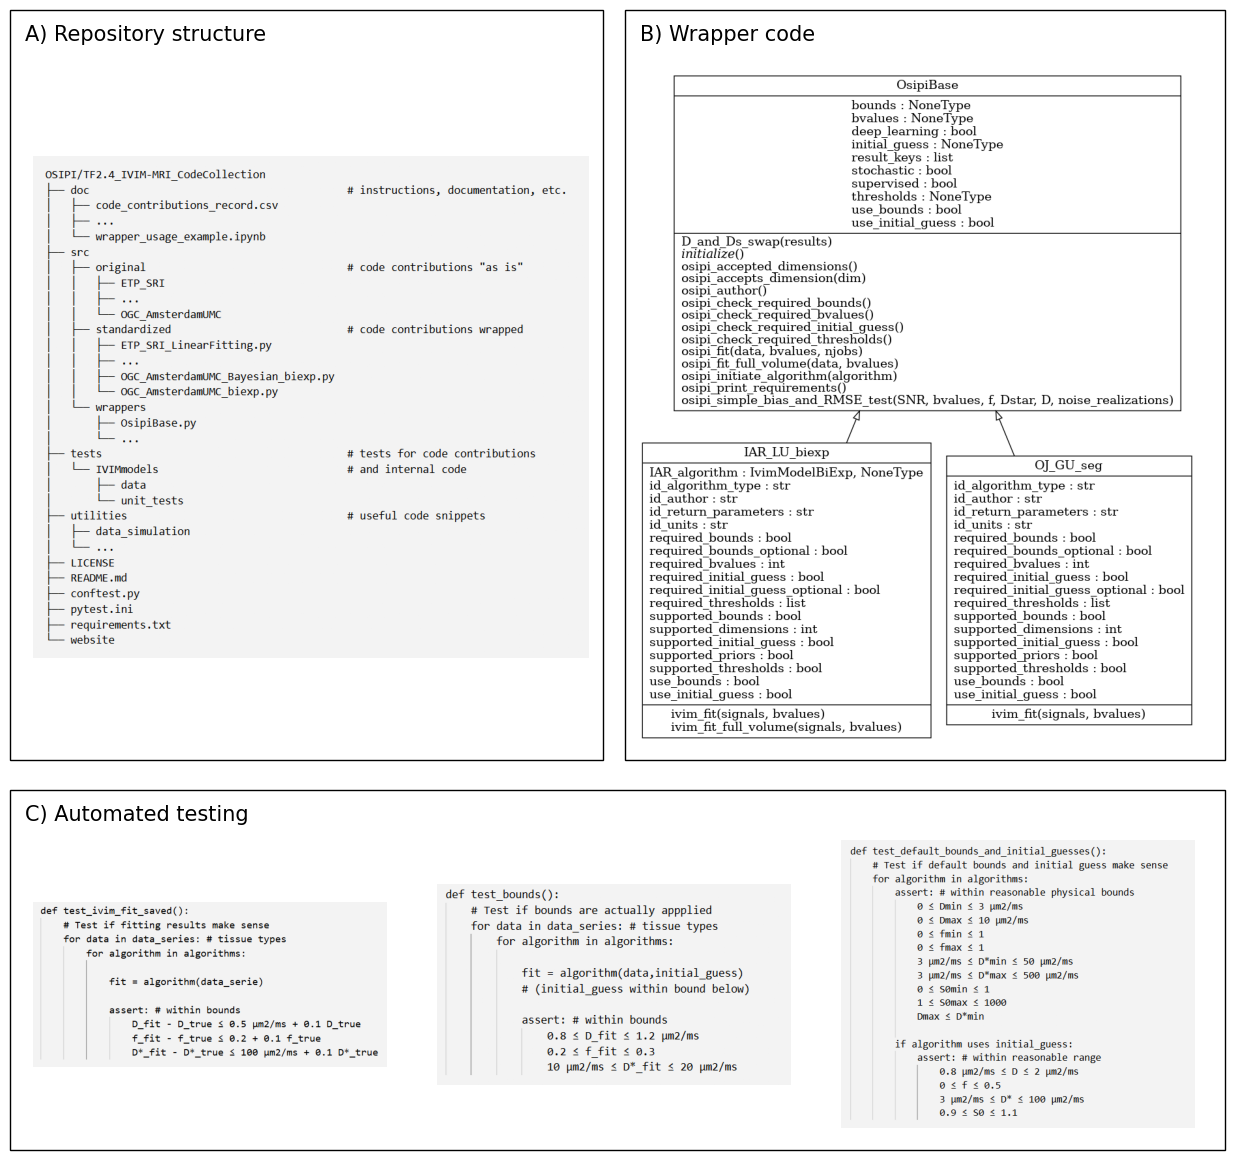

In [4]:
fig = plt.figure(figsize=(15,15))
gspec = gs.GridSpec(12, 12, wspace=1, hspace=0)
ax0 = fig.add_subplot(gspec[:7, :6])
ax1 = fig.add_subplot(gspec[:7, 6:]) 
ax2 = fig.add_subplot(gspec[7:, :4])
ax3 = fig.add_subplot(gspec[7:, 4:8])
ax4 = fig.add_subplot(gspec[7:, 8:])

for im_file, ax in zip(['dumps/repo_structure.png','figs/classes.png',
                        'dumps/pseudocode_3.png','dumps/pseudocode_2.png',
                        'dumps/pseudocode_1.png'],[ax0,ax1,ax2,ax3,ax4]):
    im = mpimg.imread(im_file)
    ax.axis('off')
    ax.imshow(im)

p1 = plt.Rectangle((0.11,0.42),0.395,0.5,clip_on=False,transform=fig.transFigure,figure=fig,fc=(0,0,0,0),ec=(0,0,0,1))
p2 = plt.Rectangle((0.52,0.42),0.4,0.5,clip_on=False,transform=fig.transFigure,figure=fig,fc=(0,0,0,0),ec=(0,0,0,1))
p3 = plt.Rectangle((0.11,0.16),0.81,0.24,clip_on=False,transform=fig.transFigure,figure=fig,fc=(0,0,0,0),ec=(0,0,0,1))
fig.patches.extend([p1,p2,p3])

fig.text(0.12, 0.91, 'A) Repository structure', ha='left', va='top',fontsize=15, color='black',transform=fig.transFigure)
fig.text(0.53, 0.91, 'B) Wrapper code', ha='left', va='top',fontsize=15, color='black',transform=fig.transFigure)
fig.text(0.12, 0.39, 'C) Automated testing', ha='left', va='top',fontsize=15, color='black',transform=fig.transFigure)

plt.tight_layout()
fig.savefig(os.path.join('figs','fig1.png'),dpi=800);

### Example images (figure 2)

In [5]:
from utilities.data_simulation.Download_data import download_data
download_data()

Title: Data to https://github.com/OSIPI/TF2.4_IVIM-MRI_CodeCollection
Keywords: 
Publication date: 2025-01-06
DOI: 10.5281/zenodo.14605039
Total size: 245.1 MB

File: OSIPI_TF24_data_phantoms.zip (245.1 MB)
Link: https://zenodo.org/api/records/14605039/files/OSIPI_TF24_data_phantoms.zip/content
OSIPI_TF24_data_phantoms.zip is already downloaded correctly.

All specified files have been processed.


Title: Data to https://github.com/OSIPI/TF2.4_IVIM-MRI_CodeCollection
Keywords: 
Publication date: 2025-01-06
DOI: 10.5281/zenodo.14605039
Total size: 245.1 MB

File: OSIPI_TF24_data_phantoms.zip (245.1 MB)
Link: https://zenodo.org/api/records/14605039/files/OSIPI_TF24_data_phantoms.zip/content
OSIPI_TF24_data_phantoms.zip is already downloaded correctly.

All specified files have been processed.


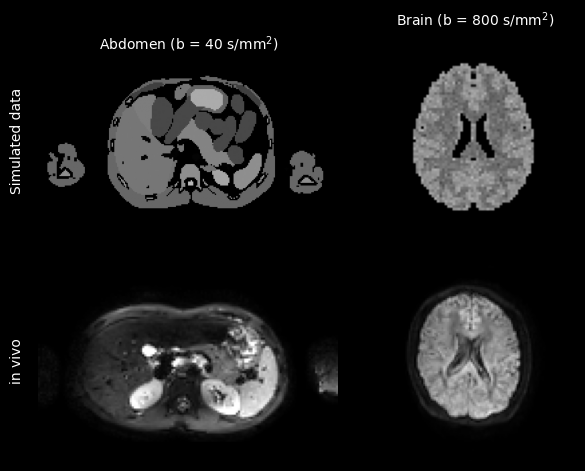

In [6]:
from phantoms.MR_XCAT_qMRI.sim_ivim_sig import phantom


fig,axess = plt.subplots(2,2)
for datasource,axes in zip(['Simulated data','in vivo'],axess):
    for region,ax in zip(['Abdomen','Brain'],axes):
        if datasource == 'Simulated data':
            if region == 'Abdomen':
                b = np.array([0,40])
                res = phantom(b,1/2000)
                im = np.flip(res[0],axis=0)
                s = 18
                idx = 1
                vmin = 0
                vmax = np.max(im)
            else:
                im_file = os.path.join(repo_root,'download','Phantoms','brain','data','diffusive_snr200.nii.gz')
                im = nib.load(im_file).get_fdata()
                b = np.loadtxt(im_file.replace('nii.gz','bval'))
                s = 31
                idx = -2
                vmin = np.quantile(im,0.8)
                vmax = np.quantile(im,0.83)
        else:
            im_file = os.path.join(repo_root,'download','Data',region.lower()+'.nii.gz')
            im = nib.load(im_file).get_fdata()
            b = np.loadtxt(im_file.replace('nii.gz','bval'))
            if region == 'Brain':
                s = 32
                idx = -8
                vmin = 0
                vmax = np.quantile(im,0.95)
            else:
                im = im[:,30:-30,:,:]
                s = 18
                idx = 2
                vmin = 0
                vmax = np.quantile(im,0.98)
    
        ax.imshow(np.rot90(im[:,:,s,idx]),cmap='gray',vmin=vmin,vmax=vmax)
        ax.axis('off')
        if ax == axes[0]:
            ax.text(-0.05*im.shape[0],0.5*im.shape[1],datasource,rotation=90,ha='right',va='center',color='w')
        if ax in axess[0]:
            ax.text(0.5*im.shape[0],-0.05*im.shape[1],f'{region} (b = {b[idx]:.0f} s/mm$^2$)',ha='center',va='bottom',color='w')
plt.tight_layout()
fig.set_facecolor('k')
#fig.savefig(os.path.join('figs','fig2.png'),dpi=400);

### Code contributions (figure 3)

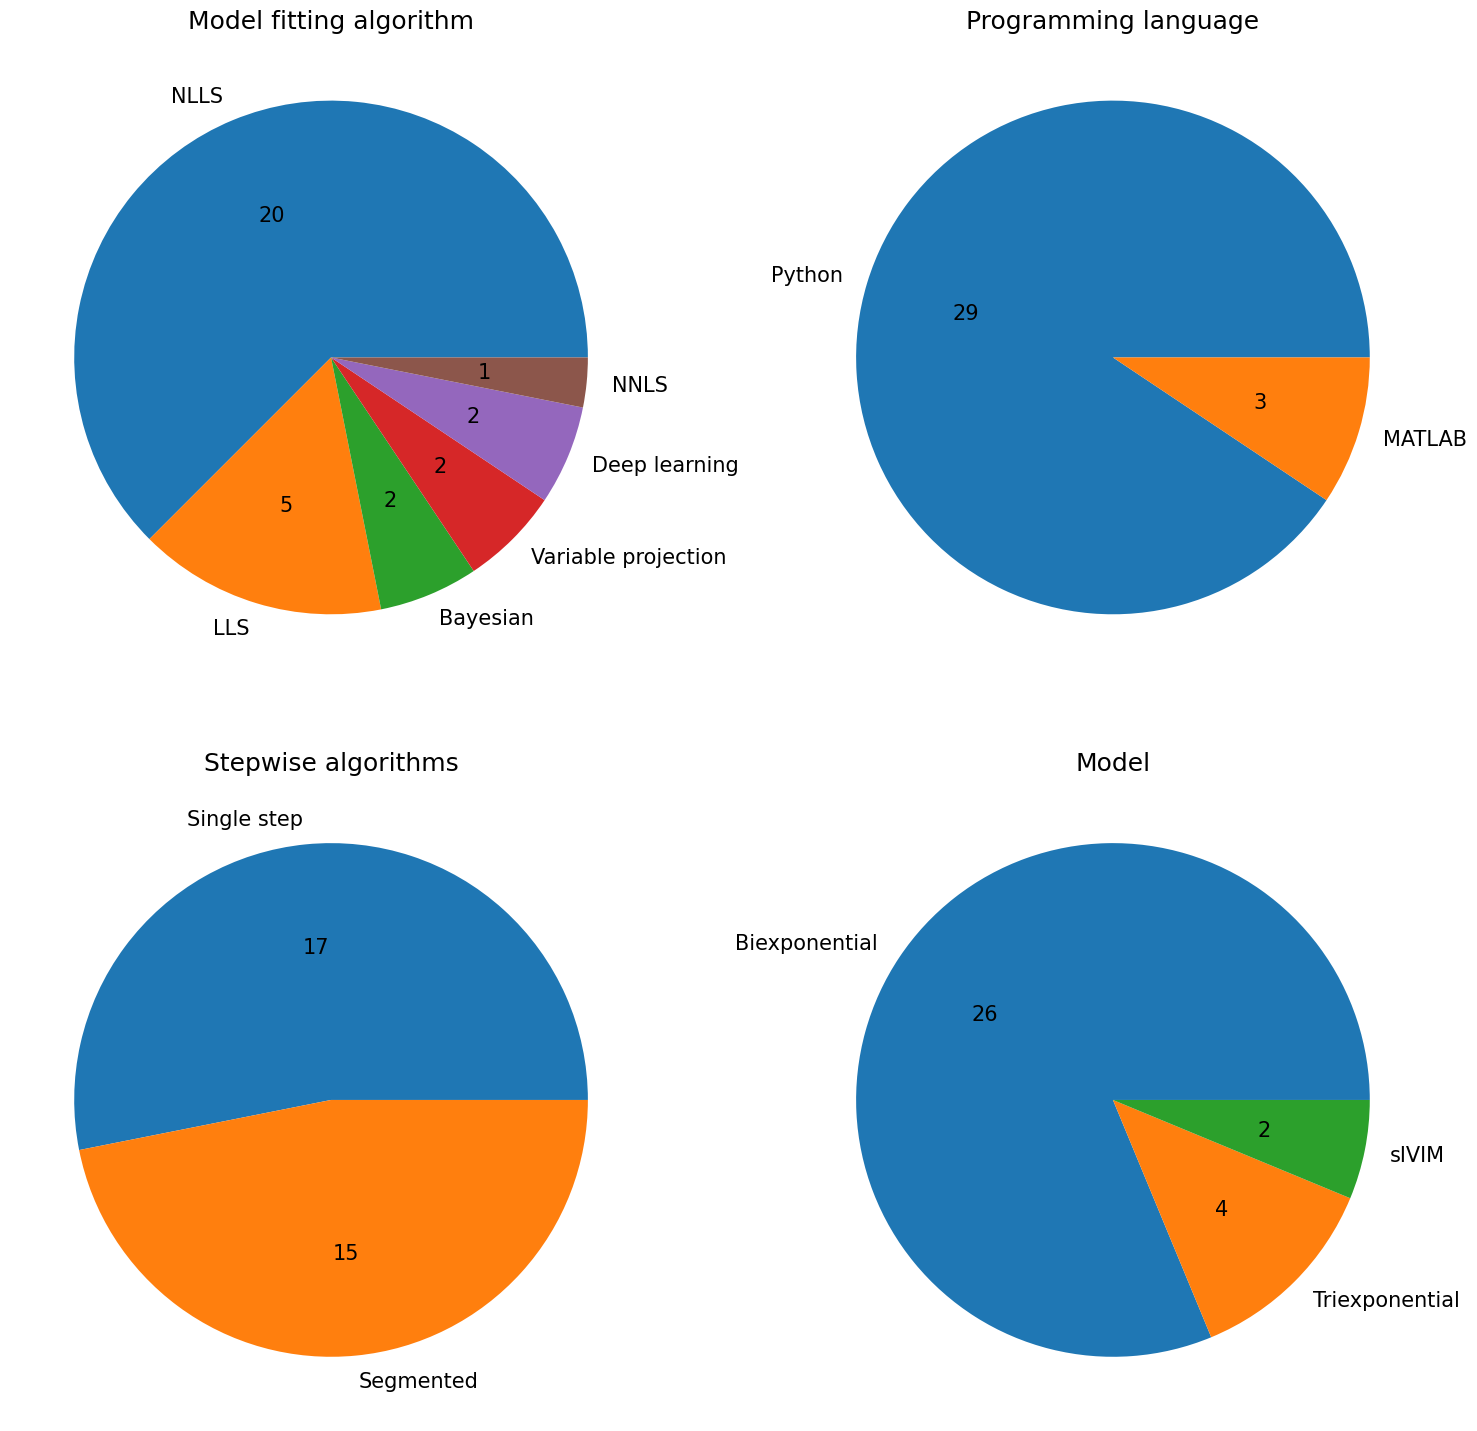

In [7]:

titles = ['Model fitting algorithm','Programming language','Stepwise algorithms','Model']
labelss = [['NLLS','LLS','Bayesian','Variable projection','Deep learning','NNLS'],['Python','MATLAB'],['Single step','Segmented'],['Biexponential','Triexponential','sIVIM']]
sizess = [[20,5,2,2,2,1],[29,3],[17,15],[26,4,2]]

colors = []

fig,axes = plt.subplots(2,2,figsize=(15,15))
for ax,title,labels,sizes in zip(axes.flatten(),titles,labelss,sizess):
    def absolute_value(val):
        a  = np.round(val/100.*np.sum(sizes), 0)
        return int(a)

    ax.pie(sizes,labels=labels,autopct=absolute_value,
           textprops={'fontsize':15})
    ax.set_title(title,fontsize=18)

plt.tight_layout()
fig.savefig(os.path.join('figs','fig3.png'),dpi=800);

### Example usage (figure 4)

In [8]:
from src.standardized.IAR_LU_biexp import IAR_LU_biexp

algorithm = IAR_LU_biexp()
algorithm.osipi_print_requirements()


### Algorithm requirements ###
Number of b-values: 4
Numer of b-value thresholds [at least, at most]: [0, 0]
Bounds required: False but is optional
Initial guess required: False but is optional


In [9]:
from utilities.data_simulation.GenerateData import GenerateData
from src.standardized.IAR_LU_biexp import IAR_LU_biexp

bvalues = [0.0, 1.0, 2.0, 5.0, 10.0, 20.0, 30.0, 50.0, 75.0, 100.0, 
            150.0, 250.0, 350.0, 400.0, 550.0, 700.0, 850.0, 1000.0]
data_generator = GenerateData()
signal = data_generator.ivim_signal(D=1e-3,Dp=10e-3,f=0.1,S0=1,
                                bvalues=bvalues,snr=30.0)

algorithm = IAR_LU_biexp()
fit = algorithm.ivim_fit(signal,bvalues)

In [10]:
import os
import nibabel as nib

im_file = os.path.join(repo_root,'download','Data','abdomen.nii.gz')
im = nib.load(im_file).get_fdata()
bvalues_im = np.loadtxt(im_file.replace('.nii.gz','.bval'))

algorithm = IAR_LU_biexp()
fit_vol = algorithm.ivim_fit_full_volume(im,bvalues_im)

In [11]:
from src.standardized.IAR_LU_biexp import IAR_LU_biexp

algorithm = IAR_LU_biexp()
algorithm.osipi_simple_bias_and_RMSE_test(
    SNR=30.0,bvalues=bvalues,f=0.1,Dstar=10e-3,D=1e-3)

f bias:     0.02037    
f RMSE:     0.07967
Dstar bias: 0.01421
Dstar RMSE: 0.03217
D bias:     -1.414e-05    
D RMSE:     0.0001393


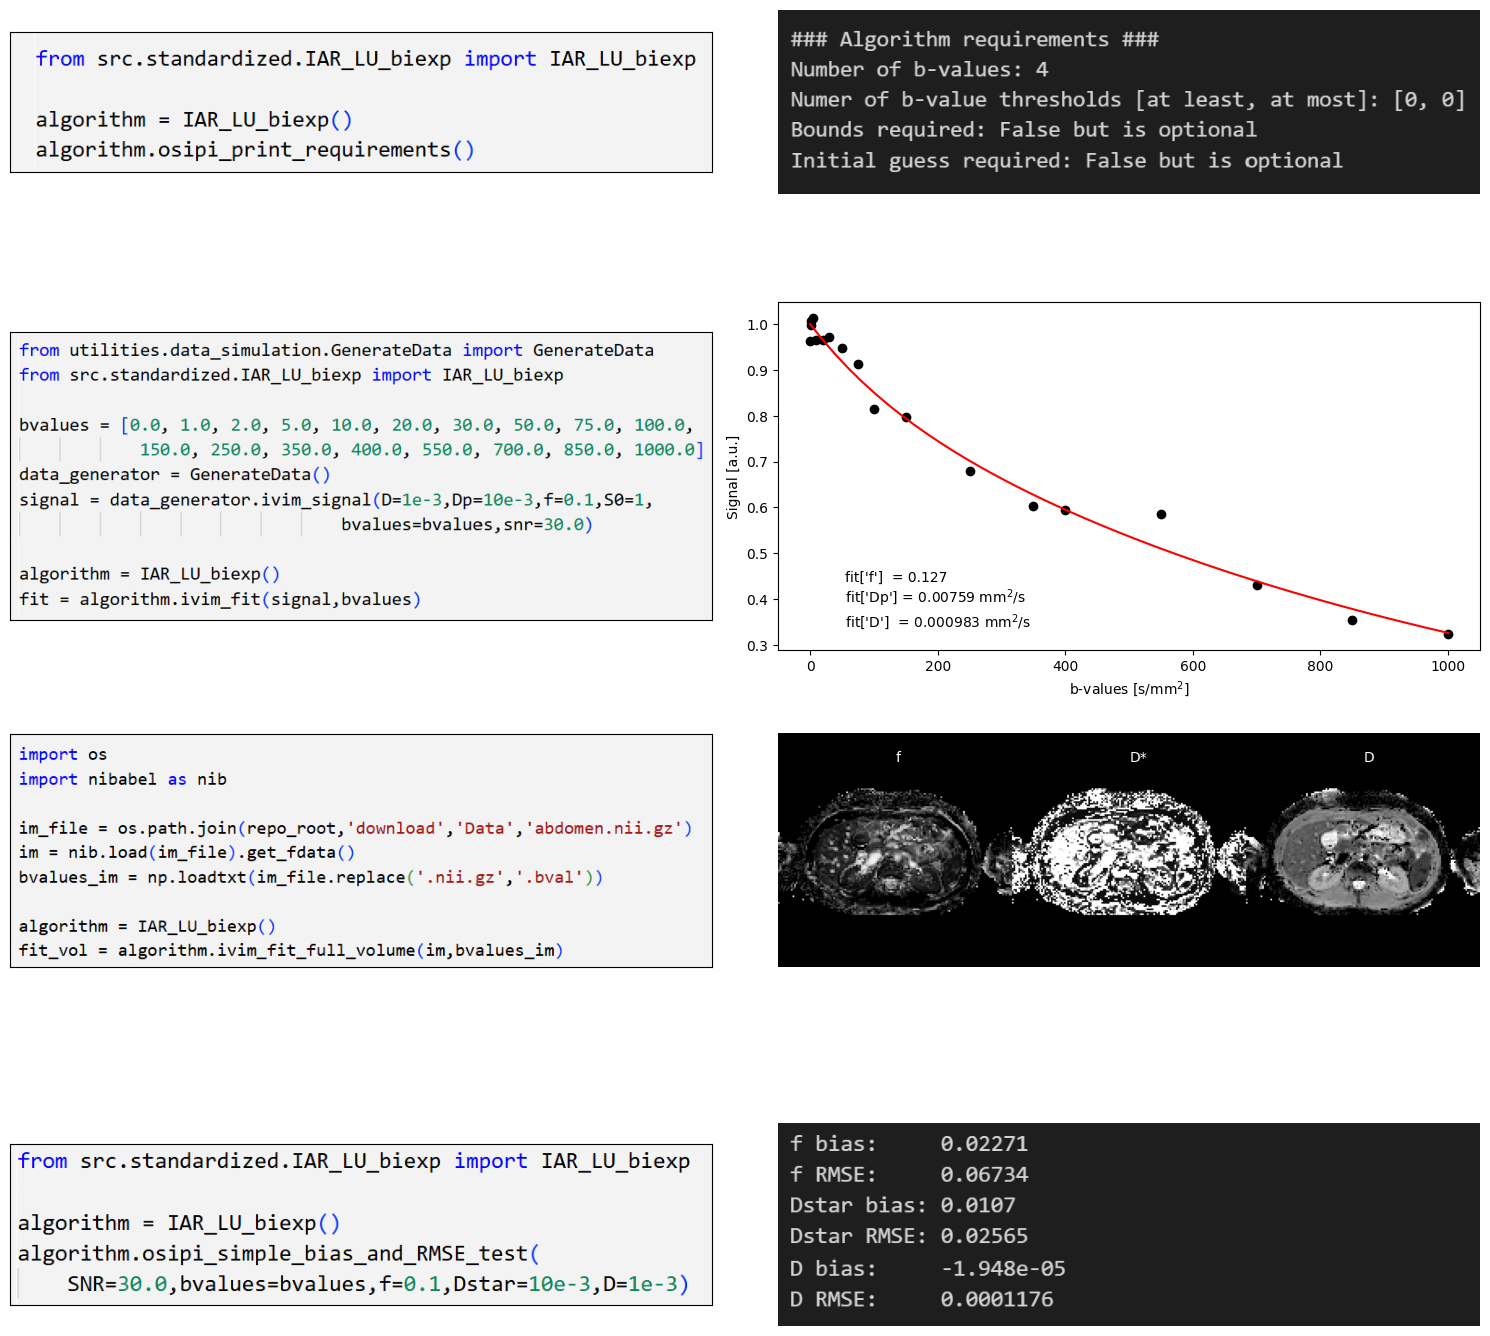

In [12]:
fig,axess = plt.subplots(4,2,figsize=(15,15))
for i,axes in enumerate(axess):
    output = ""
    if i == 0:
        output = mpimg.imread('dumps/output1.png')
        axes[1].imshow(output)
        axes[1].axis('off')

    elif i == 1:
        axes[1].plot(bvalues,signal,'ko',label='data')
        bplot = np.linspace(np.min(bvalues),np.max(bvalues))
        signalplot = data_generator.ivim_signal(D=fit['D'],Dp=fit['Dp'],f=fit['f'],
                                                S0=1,bvalues=bplot)
        axes[1].plot(bplot,signalplot,'r-',label='fit to data')
        fit_results = f"""
        fit['f']  = {fit['f']:.3}
        fit['Dp'] = {fit['Dp']:.3} mm$^2$/s 
        fit['D']  = {fit['D']:.3} mm$^2$/s
                      """
        axes[1].text(0,0.3,fit_results)
        axes[1].set_ylabel('Signal [a.u.]')
        axes[1].set_xlabel('b-values [s/mm$^2$]')

    elif i == 2:
        scale = {'f':1,'Dp':100e-3,'D':3e-3}
        sz = fit_vol['f'].shape
        parmaps = np.zeros((sz[1],3*sz[0]))
        for idx, par in enumerate(['f','Dp','D']):
            parmaps[:,idx*sz[0]:(idx+1)*sz[0]] = (np.rot90(fit_vol[par][:,:,10]))/scale[par]

        parmaps[np.tile(np.rot90(im[:,:,10,0]),(1,3))<=0] = 0


        axes[1].imshow(parmaps,cmap='gray',vmin=0,vmax=1)
        axes[1].axis('off')
        for idx, par in enumerate(['f','D*','D']):
            axes[1].text(sz[1]*(0.5+idx),0.1*sz[0],par,va='center',color='w')

    else: # i == 3
        output = mpimg.imread('dumps/output4.png')
        axes[1].imshow(output)
        axes[1].axis('off')

    cmd = mpimg.imread(f'dumps/cmd{i+1}.png')
    axes[0].imshow(cmd)

    for j,ax in enumerate(axes):
        if (i == 0) or (j==0) or (j==3):
            ax.set_xticks([])
            ax.set_yticks([])

plt.tight_layout()
fig.savefig(os.path.join('figs','fig4.png'),dpi=800);

### Testing overview (figure 5)

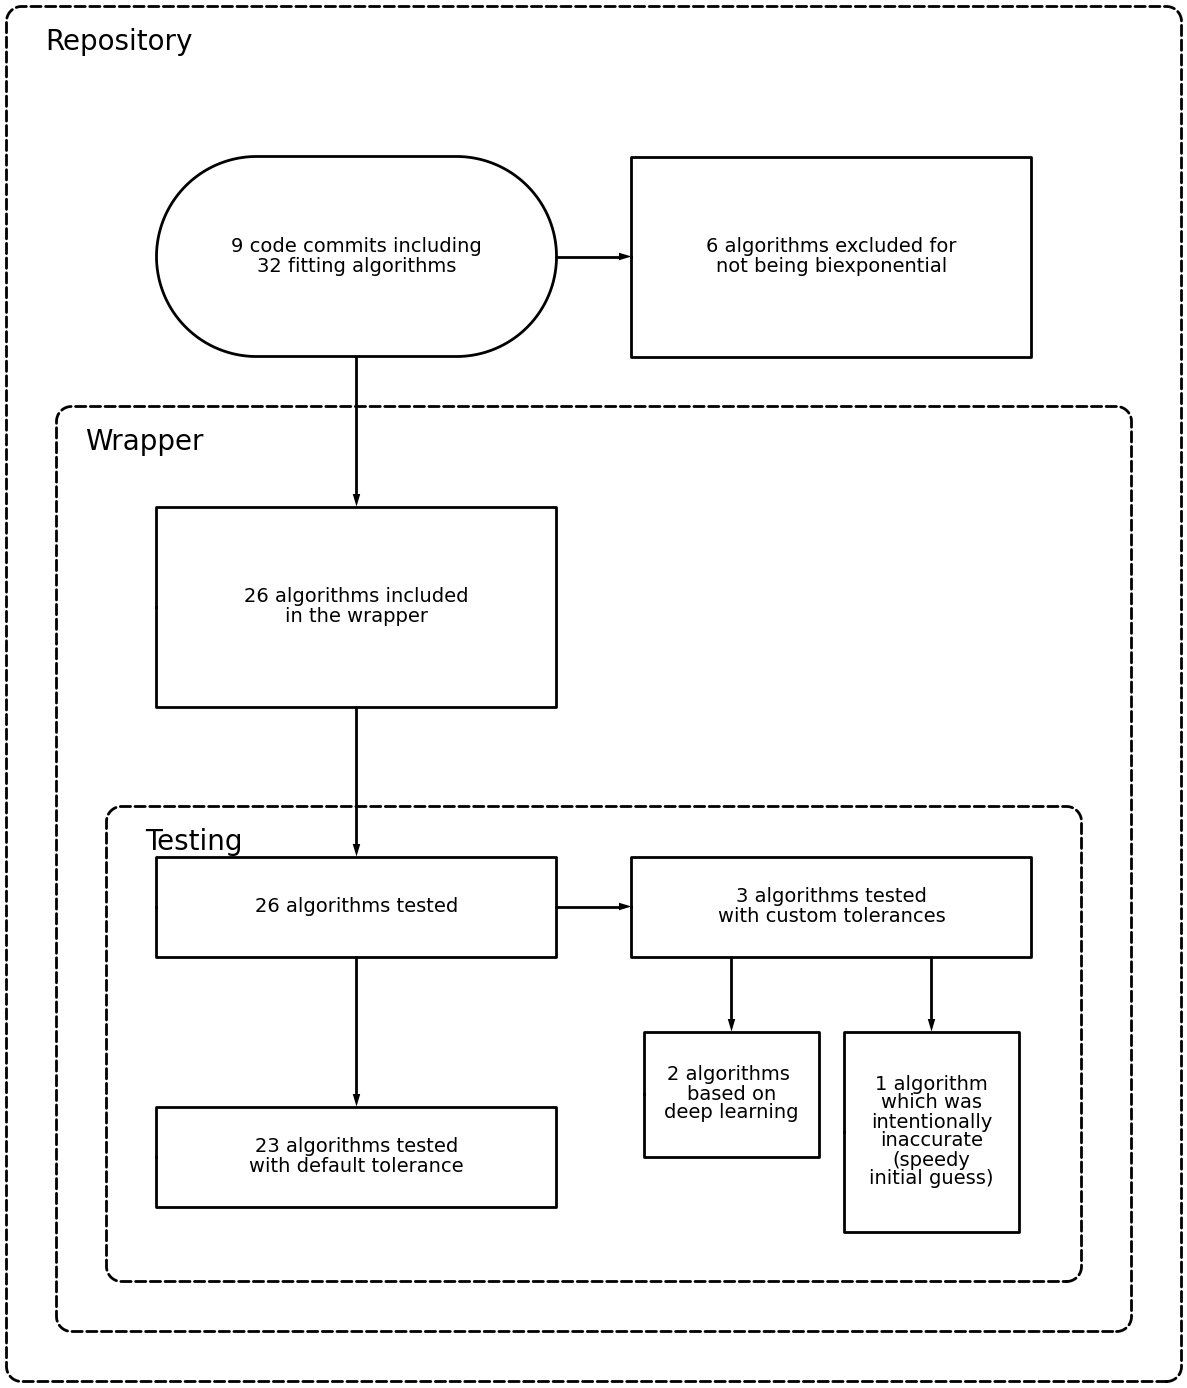

In [13]:
with schemdraw.Drawing() as d:
    d.config(fontsize=14)

    # Code contributions
    d += (conts := flow.Start(w=8, h=4).label("9 code commits including\n32 fitting algorithms"))

    # Wrapper
    d += flow.Arrow().right(d.unit/2).at(conts.E)
    d += (not_wrapped := flow.Box(w=8, h = 4).label("6 algorithms excluded for\nnot being biexponential"))
    d += flow.Arrow().down(d.unit).at(conts.S)
    d += (wrapped := flow.Box(w=8, h = 4).label("26 algorithms included\nin the wrapper"))

    # Testing
    d += flow.Arrow().down(d.unit).at(wrapped.S)
    d += (tested := flow.Box(w=8, h = 2).label("26 algorithms tested"))
    d += flow.Arrow().down(d.unit).at(tested.S)
    d += (tested_default := flow.Box(w=8, h = 2).label("23 algorithms tested\nwith default tolerance"))
    d += flow.Arrow().right(d.unit/2).at(tested.E)
    d += (tested_custom := flow.Box(w=8, h = 2).label("3 algorithms tested\nwith custom tolerances"))
    d += flow.Arrow().down(d.unit/2).at(tested_custom.SSW)
    d += (tested_custom_dl := flow.Box(w=3.5, h = 2.5).label("2 algorithms \nbased on\ndeep learning"))
    d += flow.Arrow().down(d.unit/2).at(tested_custom.SSE)
    d += (tested_custom_speed := flow.Box(w=3.5, h = 4).label("1 algorithm\nwhich was\nintentionally\ninaccurate\n(speedy\ninitial guess)"))

    # Enclosing
    d.config(fontsize=20)
    d += (testing := elm.EncircleBox([tested_default,tested_custom,tested_custom_dl,tested_custom_speed,tested], padx=1, pady=1).linestyle("--").linewidth(2).color('black').label('Testing', loc='top', ofst=(-8,-1)))
    d += (wrapper := elm.EncircleBox([tested_default,tested_custom,tested_custom_dl,tested_custom_speed,tested,wrapped], padx=2, pady=2).linestyle("--").linewidth(2).color('black').label('Wrapper', loc='top', ofst=(-9,-1)))
    d += (repository := elm.EncircleBox([tested_default,tested_custom,tested_custom_dl,tested_custom_speed,tested,wrapped,not_wrapped,conts], padx=3, pady=3).linestyle("--").linewidth(2).color('black').label('Repository', loc='top', ofst=(-9.5,-1)))

    # Save fig
    d.save(os.path.join('figs','fig5.eps'));

### Test results (figure 6)

In [14]:
os.chdir(os.path.dirname(os.path.dirname(os.getcwd())))
os.system('python -m pytest --doctest-modules --junitxml=papers/paper1/test-results_body.xml --withmatlab')
os.system('python -m pytest --doctest-modules --junitxml=papers/paper1/test-results_brain.xml --dataFile tests/IVIMmodels/unit_tests/generic_brain.json -k test_ivim_fit_saved --withmatlab')
os.chdir(os.path.join('papers','paper1'))

============================= test session starts ==============================
platform linux -- Python 3.10.14, pytest-8.4.1, pluggy-1.6.0
rootdir: /home/oscar/programming/TF2.4_IVIM-MRI_CodeCollection
configfile: pytest.ini
testpaths: tests
plugins: json-report-1.5.0, metadata-3.1.1
collected 2101 items / 702 deselected / 1399 selected

tests/IVIMmodels/data/test_GenerateData.py .......................       [  1%]
tests/IVIMmodels/unit_tests/test_ivim_fit.py ........................... [  3%]
........................................................................ [  8%]
........................................................................ [ 13%]
........................................................................ [ 19%]
........................................................................ [ 24%]
........................................................................ [ 29%]
........................................................................ [ 34%]
.................

In [15]:
import xml.etree.ElementTree as ET

pars = ['f','D','Dp']
algorithms = [alg.replace('.py','') for alg in os.listdir(os.path.join('..','..','src','standardized')) if not alg.startswith('__')]

result = {}
ground_truth = {}

for body_part in ['body','brain']:
    testresults_file = os.path.join(f'test-results_{body_part}.xml')
    tree = ET.parse(testresults_file)
    root = tree.getroot()

    result[body_part] = {}
    ground_truth[body_part] = {}

    for par in pars:
        result[body_part][par] = {}
        ground_truth[body_part][par] = {}
        for algorithm in algorithms:
            result[body_part][par][algorithm] = []
            ground_truth[body_part][par][algorithm] = []

    testsuite = root[0]
    for child in testsuite:
        if child.attrib['classname'] == 'tests.IVIMmodels.unit_tests.test_ivim_fit':
            for cc in child:
                for ccc in cc:
                    value = eval(ccc.attrib['value'])
                    for par in pars:
                        result[body_part][par][value['algorithm']].append(value[par+'_fit'])
                        ground_truth[body_part][par][value['algorithm']].append(value[par])

/tmp/ipykernel_2256303/1720186302.py:48: RuntimeWarning: divide by zero encountered in divide
  yplot = tol['rtol'][par]*np.ones_like(xplot) + tol['atol'][par]/xplot
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


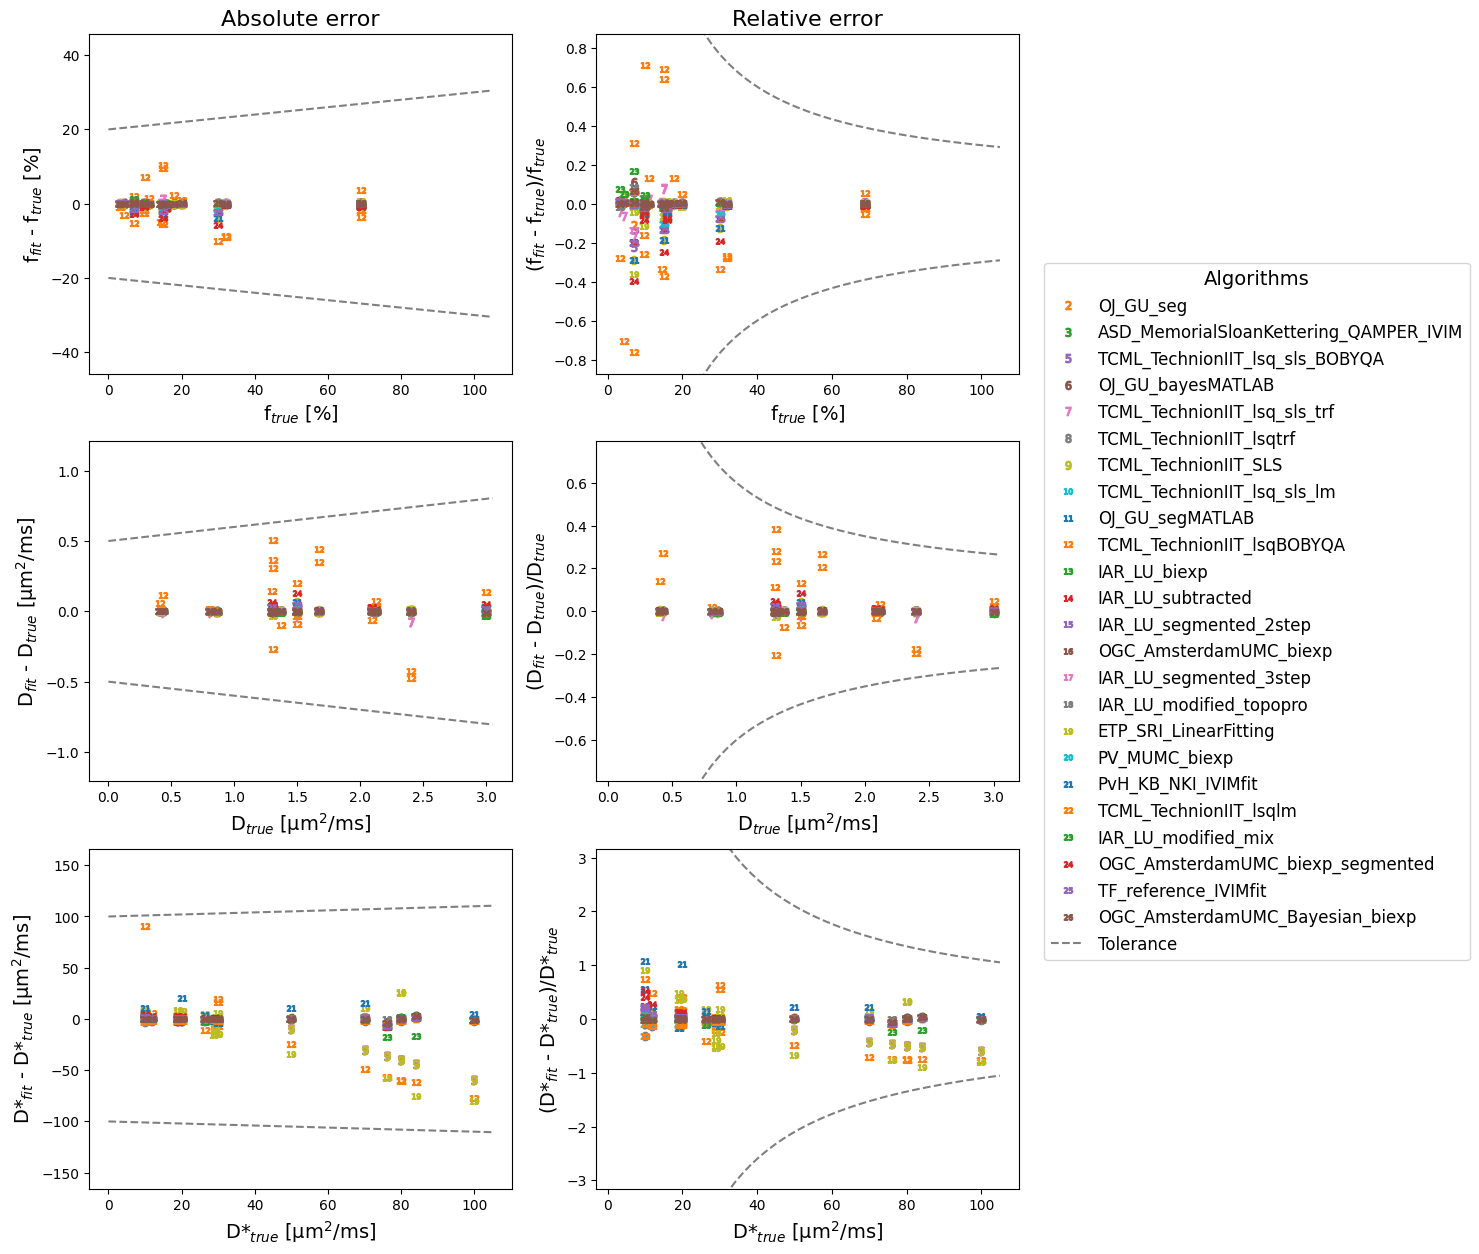

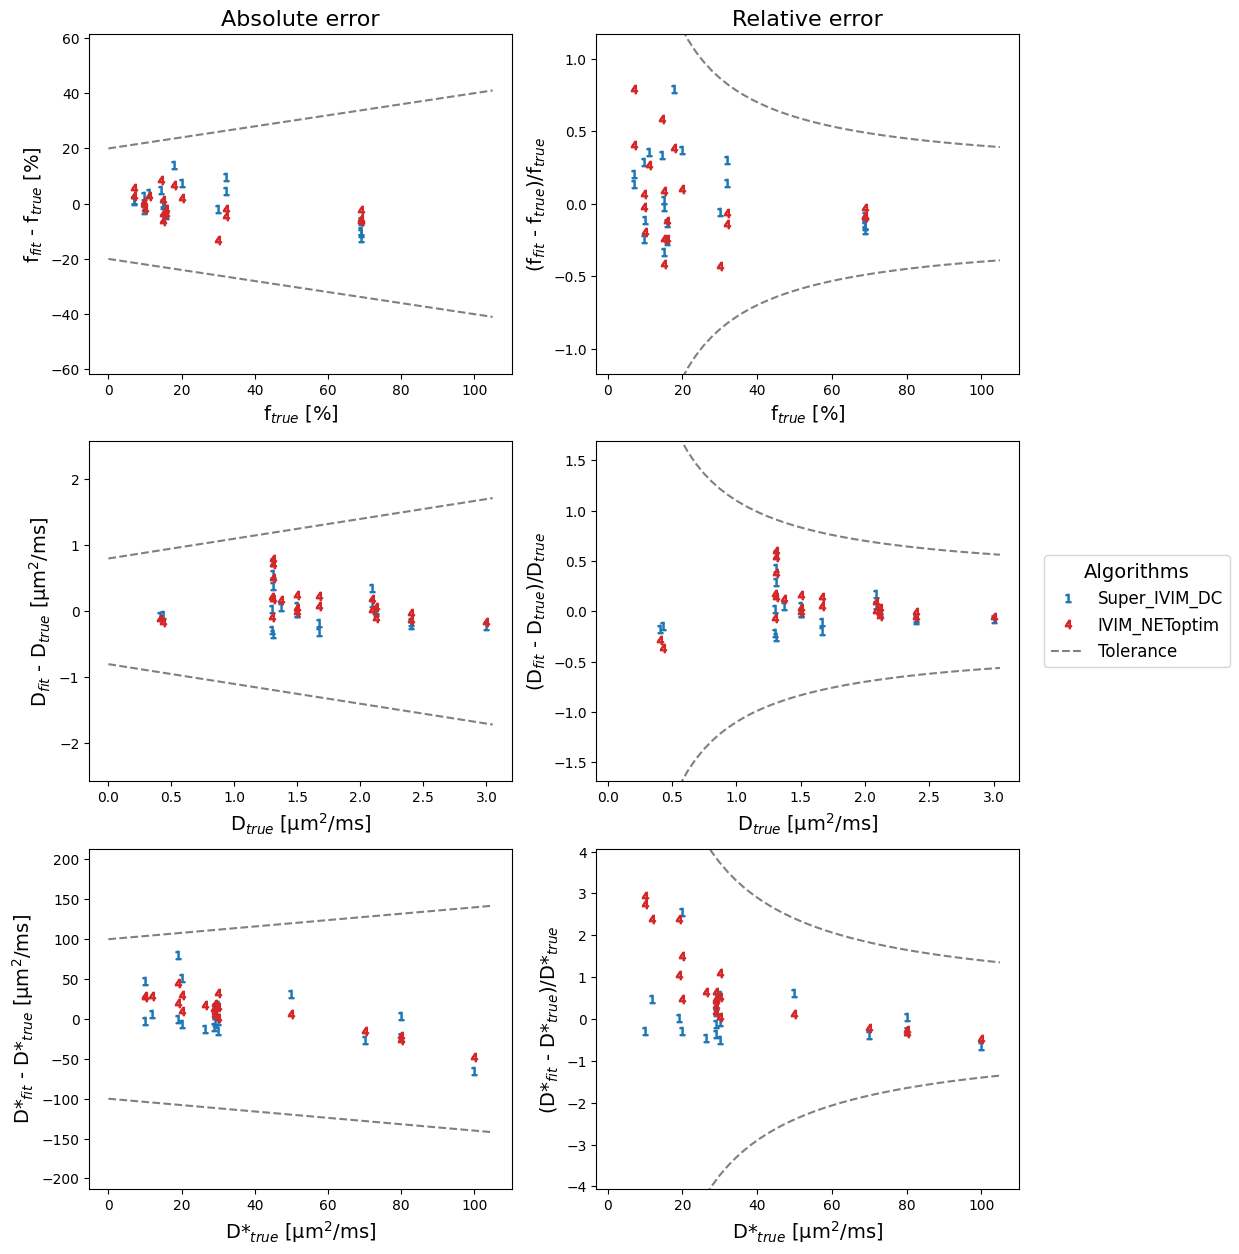

In [17]:
tols = {'rtol': {'f': 0.1, 'D': 0.1, 'Dp': 0.1}, 'atol': {'f': 0.2, 'D': 5e-4, 'Dp': 10e-2}}
tols_dl = {'rtol':{"f": 0.2, "D": 0.3, "Dp": 0.4}, 'atol':{"f": 2e-1, "D": 8e-4, "Dp": 10e-2},}
scale = {'f':100,'D':1e3,'Dp':1e3}
units = {'f':'%','D':'µm$^2$/ms','Dp':'µm$^2$/ms'}
xlim = {'f':[-0.05,1.05],'D':[-0.05e-3,3.05e-3],'Dp':[-0.005,0.105]}
plot_pars = {'f':'f','D':'D','Dp':'D*'}
for tol,alg_type in zip([tols, tols_dl],['conv','dl']):
    fig,axess = plt.subplots(3,2,figsize=(12,15))
    for axes,par in zip(axess,pars):
        for a,ax in enumerate(axes):
            label_done = False
            for idx,algorithm in enumerate(algorithms):
                if (alg_type == 'dl') != (algorithm in ['Super_IVIM_DC','IVIM_NEToptim']):
                    continue
                #idx += 1
                for body_part in ['body','brain']:
                    x = np.array(ground_truth[body_part][par][algorithm])

                    if par == 'D':
                        mask = np.array(ground_truth[body_part]['f'][algorithm]) < 0.8
                    elif par == 'Dp':
                        mask = np.array(ground_truth[body_part]['f'][algorithm]) > 0.03
                    else: 
                        mask = np.full(np.shape(ground_truth[body_part]['f'][algorithm]),True)
                    mask &= (np.array(ground_truth[body_part]['f'][algorithm]) > 0.01) & (np.array(ground_truth[body_part]['f'][algorithm]) < 0.99)

                    res = np.array(result[body_part][par][algorithm])[mask]
                    x = x[mask]
                    if a == 0:
                        y = res - x
                    else:
                        y = (res-x)/x

                    
                    if a == 0:
                        y *= scale[par]

                    if body_part == 'body':
                        label = algorithm
                    else:
                        label = ''
                    ax.plot(x*scale[par],y,marker=f'${idx+1}$',linestyle='none',label=label, mfc='none',color=f'C{idx}')

            xplot = np.linspace(0,xlim[par][1])
            if a == 0:
                yplot = scale[par]*(tol['atol'][par]*np.ones_like(xplot) + tol['rtol'][par]*xplot)
            else:
                yplot = tol['rtol'][par]*np.ones_like(xplot) + tol['atol'][par]/xplot
            for sign in [-1,1]:
                label = ''
                if (sign == -1):
                    label = 'Tolerance'
                ax.plot(xplot*scale[par],sign*yplot,'--',color='gray',label=label)

            if par == pars[0]:
                if a == 0:
                    title = 'Absolute error'
                else:
                    title = 'Relative error'
                ax.set_title(title,fontsize=16)
            elif par == pars[1]:
                if a == 1:
                    ax.legend(bbox_to_anchor=(1.04,0.5),loc="center left",title='Algorithms',title_fontsize=14,fontsize=12)
            xlabel = f'{plot_pars[par]}' + '$_{true}$' + f' [{units[par]}]'
            ax.set_xlabel(xlabel,fontsize=14)

            if a == 0:
                ylabel = f'{plot_pars[par]}' + '$_{fit}$ - ' + f'{plot_pars[par]}' + '$_{true}$' + f' [{units[par]}]'
            else:
                ylabel = f'({plot_pars[par]}' + '$_{fit}$ - ' + f'{plot_pars[par]}' + '$_{true}$)/' + f'{plot_pars[par]}' + '$_{true}$'
            
            ax.set_ylabel(ylabel,fontsize=14)

            ylim = yplot[-1]*np.array([-1,1])
            if a == 0:
                ylim *= 1.5
            else:
                ylim *= 3
            ax.set_ylim(ylim) # [-tols['rtol'][par]*10,tols['rtol'][par]*10]

    fig.savefig(os.path.join('figs',f'fig6_{alg_type}.eps'));